In [1]:
import numpy as np
import pickle

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!ls

drop-activation-history.dict
drop_activation.py
logs
logs_randomized_relu
model_ckpt_dropactivation_best_drop-activation.h5
model_ckpt_dropactivation_best_randomized-relu.h5
model_ckpt_dropactivation_best_relu-dropout.h5
model_ckpt_dropactivation_best_relu.h5
__pycache__
randomized-relu-history.dict
randomized_relu.py
random_weights.h5
README.md
relu-dropout-history.dict
relu-history.dict
ResNet-56_CIFAR10_DropActivation.ipynb
ResNet-56_CIFAR10_ReLU.ipynb
ResNet-56_CIFAR10_ReLUxDropout.ipynb
ResNet-56_CIFAR10_RReLU.ipynb
resnet.py
test_drop_activation_layer.ipynb
test_randomized_relu.ipynb
train.py
Untitled.ipynb


In [4]:
hist_drop_activation = 'drop-activation-history.dict'
with open(hist_drop_activation, 'rb') as f:
    hist_drop_activation = pickle.load(f)

hist_randomized_relu = 'randomized-relu-history.dict'
with open(hist_randomized_relu, 'rb') as f:
    hist_randomized_relu = pickle.load(f)
    
hist_relu_dropout = 'relu-dropout-history.dict'
with open(hist_relu_dropout, 'rb') as f:
    hist_relu_dropout = pickle.load(f)
    
hist_relu = 'relu-history.dict'
with open(hist_relu, 'rb') as f:
    hist_relu = pickle.load(f)

In [7]:
EPOCHS = 200
INIT_LR = 0.1

def schedule(epoch):
    if epoch < 91:
        return INIT_LR
    if epoch < 136:
        return 0.1*INIT_LR
    if epoch < 182:
        return 0.01*INIT_LR
    else:
        return 0.001*INIT_LR
lr = [schedule(e) for e in range(EPOCHS)]

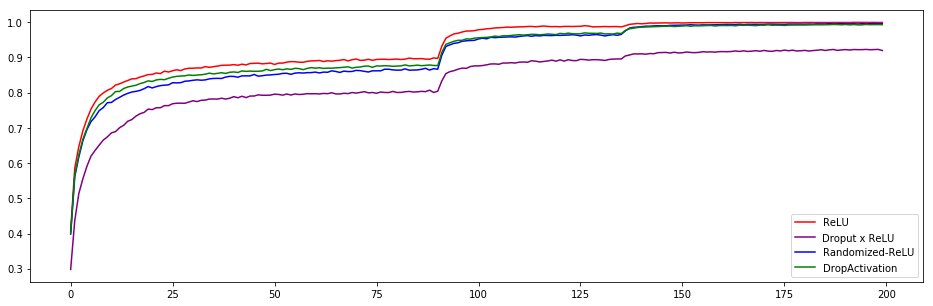

In [10]:
x = list(range(EPOCHS))
plt.figure(figsize=(16,5))

key = 'acc'

plt.plot(x, hist_relu[key], color='red', label='ReLU')
plt.plot(x, hist_relu_dropout[key], color='purple', label='Droput x ReLU')
plt.plot(x, hist_randomized_relu[key], color='blue', label='Randomized-ReLU')
plt.plot(x, hist_drop_activation[key], color='green', label='DropActivation')
plt.legend(loc='lower right')

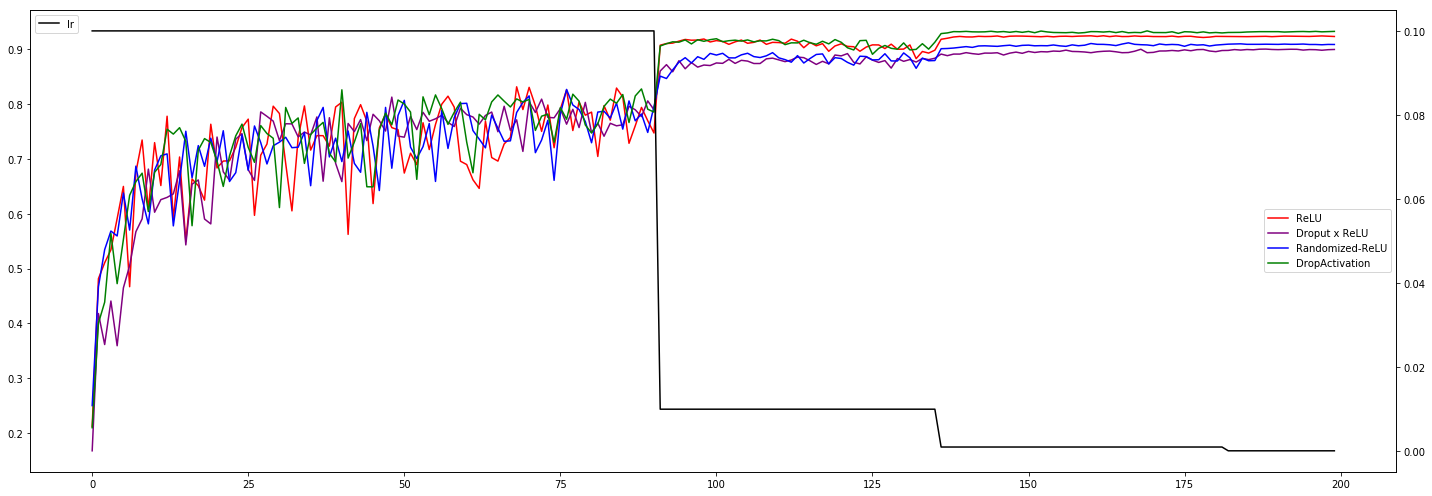

In [23]:
x = list(range(EPOCHS))

fig, ax1 = plt.subplots(figsize=(20,7))

key = 'val_acc'

ax1.plot(x, hist_relu[key], color='red', label='ReLU')
ax1.plot(x, hist_relu_dropout[key], color='purple', label='Droput x ReLU')
ax1.plot(x, hist_randomized_relu[key], color='blue', label='Randomized-ReLU')
ax1.plot(x, hist_drop_activation[key], color='green', label='DropActivation')
plt.legend(loc='center right')

ax2 = ax1.twinx()
ax2.plot(x, lr, color='black', label='lr')

plt.legend(loc='upper left')

fig.tight_layout()
